# A work in progress!

2969
Tolerance Parameter (pct): 5


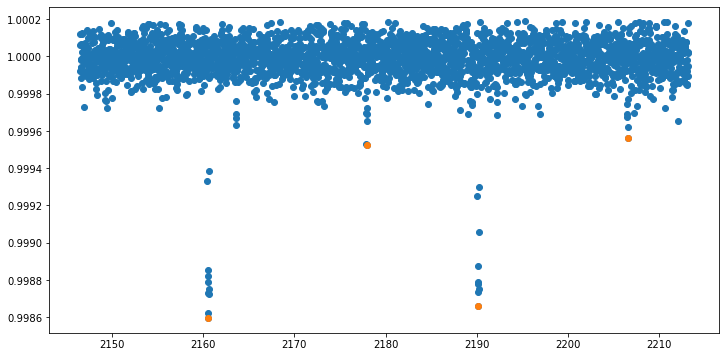

In [6]:
import numpy as np
from keplersplinev2 import *
import itertools
import lightkurve as lk
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,6))
with open("hlsp_k2sff_k2_lightcurve_206082454-c03_kepler_v1_llc-default-aper.txt", "r") as f:
    data = np.genfromtxt(f, delimiter=',', usecols=[0, 1], names=["time", "flux"], encoding="Latin_1")
data = np.delete(data, 0)
input_mask = np.ones_like(data["time"], dtype=np.bool)
input_mask[595:625] = False
s, metadata = choosekeplersplinev2(data["time"], data["flux"], return_metadata=True)
l = list(data["flux"] / s)
h = 0
index_list = []
for point in l:
    index_list.append(h)
    h+=1 
print(len(index_list))
percentile = np.percentile(l, 2.75)
                      
xs = list(data["time"])
some_xs = xs
#median_values = []
#for x in range(len(xs)):
    #median_values.append(median)
lc = lk.LightCurve(xs, l)
xy = [x for x in itertools.chain.from_iterable(itertools.zip_longest(xs, l)) if x]
coords = [xy[x:x + 2] for x in range(0, len(xy), 2)]
quartiles = np.percentile(l, [25, 50, 75])
iqr = float(quartiles[2] - quartiles[0])
outlier_threshold = float(1.5 * iqr) + float(quartiles[1])
revised = [x for x in l if x < outlier_threshold]
revised_x = []
for x, y in coords:
    if y in revised:
        revised_x.append(x)
xy2 = [x for x in itertools.chain.from_iterable(itertools.zip_longest(revised_x, revised)) if x]
coords2 = [xy2[x:x + 2] for x in range(0, len(xy2), 2)]
x_coordinates = [row[0] for row in coords2]
y_coordinates = [row[1] for row in coords2]
plt.scatter(x_coordinates, y_coordinates)
list_of_lists = []
for index in range(len(revised)):
    if index > 19:
        lower = index - 20
        upper = index + 21
        new_list = revised[lower:upper]
        list_of_lists.append(new_list)
    else:
        new_list = revised[0:int(index + 21)]
        list_of_lists.append(new_list)
booleans = []
for a, b in zip(revised, list_of_lists):
    if a == min(b):
        booleans.append(True)
    else:
        booleans.append(False)
median_offsets = []
for a, b in zip(booleans, list_of_lists):
    if a is True:
        offset = abs(np.median(b) - min(b))
        median_offsets.append(offset)
    else:
        median_offsets.append(0)
good_list = [x for x in median_offsets if x != 0]
threshold = np.mean(good_list) + 0.8 * np.std(good_list)
final_list = []
for x in median_offsets:
    if x >= threshold:
        final_list.append(x)
    else:
        final_list.append(0)
tuples = []

for a, b in zip(final_list, revised):
    if a != 0:
        g = b
        for index, (x, y) in enumerate(coords2):
            if y == g:
                a_tuple = (x, y, index)
                tuples.append(a_tuple)

x_coords = []
for x, y, z in tuples:
    x_coords.append(x)
indices_of_minima = []
for x, y, z in tuples:
    indices_of_minima.append(z)
minima_x = [element[0] for element in tuples]
minima_y = [element[1] for element in tuples]
plt.scatter(minima_x, minima_y)
#plt.scatter(some_xs, median_values)
l = [x2 - x for x, x2 in zip(x_coords[: -1], x_coords[1:])]
tolerance_parameter = float(input('Tolerance Parameter (pct): ')) / 100
l2 = []
for element_1 in l:
    boolean = True
    for element_2 in l2:
        lower_bound = (1 - tolerance_parameter) * element_2
        upper_bound = (1 + tolerance_parameter) * element_2
        if lower_bound < element_1 < upper_bound:
            boolean = False
    if boolean is True:
        l2.append(element_1)
l2.sort()
index_initial = 0
while index_initial < len(l2):
    index_after = index_initial + 1
    while index_after < len(l2):
        near_zero = tolerance_parameter * l2[index_initial]
        near_smaller = (1 - tolerance_parameter) * l2[index_initial]
        mod_val = l2[index_after] % l2[index_initial]
        if mod_val < near_zero or mod_val >= near_smaller:
            l2.remove(l2[index_after])
        else:
            index_after += 1
    index_initial += 1
    


number_of_planets = len(l2)
if number_of_planets == 0:
    print("NTP detected.")
#if number_of_planets == 1:
    #do established procedures
#else:
    #do forthcoming procedures
    
#periodogram = lc.to_periodogram(method="bls", period=np.arange(period_undershoot, period_overshoot, 0.00001))
#best_fit_period = periodogram.period_at_max_power
#print('Best fit period: {:.3f}'.format(best_fit_period))
#lc = lc.fold(19.307044)
#lc.scatter();
#lc.to_csv("folded.csv")

dip_zones = []
for x, y, z in tuples:
    index_index = z - 1
    while coords2[index_index][1] < percentile:
        index_index = index_index - 1
    first_x = coords2[index_index][0] 
    first_y = coords2[index_index][1]
    first_index = index_index
    index_index = z + 1
    while coords2[index_index][1] < percentile:
        index_index = index_index + 1
    third_x = coords2[index_index][0] 
    third_y = coords2[index_index][1]
    third_index = index_index
    dip_zone = [first_x, first_y, first_index, x, y, z, third_x, third_y, third_index]
    dip_zones.append(dip_zone)
possible_durations = []
for element in dip_zones:
    first_guess = abs(element[6] - element[0])
    possible_durations.append(first_guess)
#print(possible_durations)
#print(l2)
#for x, y, z in tuples:
    #for x1, y1 in coords2:

In [7]:
l = []
for thing in itertools.combinations(x_coords, 2):
    l.append((abs(thing[1] - thing[0])))


l2 = []
for element_1 in l:
    boolean = True
    for element_2 in l2:
        lower_bound = (1 - tolerance_parameter) * element_2
        upper_bound = (1 + tolerance_parameter) * element_2
        if lower_bound < element_1 < upper_bound:
            boolean = False
    if boolean is True:
        l2.append(element_1)
        
l2.sort()

index_initial = 0

while index_initial < len(l2):
    index_after = index_initial + 1
    while index_after < len(l2):
        near_zero = tolerance_parameter * l2[index_initial]
        near_smaller = (1 - tolerance_parameter) * l2[index_initial]
        mod_val = l2[index_after] % l2[index_initial]
        if mod_val < near_zero or mod_val >= near_smaller:
            l2.remove(l2[index_after])
        else:
            index_after += 1
    index_initial += 1

no_planets = False
minima_found = False

if len(l2) == 0:
    no_planets = True

if len(l2) == 1:
    minima_found = True
    number_of_planets = 1

elif len(l2) > 1:
    segregated_fluxes = []
    min_fluxes = minima_y
    for index1 in range(len(min_fluxes)):
        for index2 in range(index1 + 1, len(min_fluxes)):
            if .9999*min_fluxes[index2] < min_fluxes[index1] < 1.0001*min_fluxes[index2]:
                segregated_fluxes.append((min_fluxes[index1], min_fluxes[index2]))
            
    number_of_planets = len(segregated_fluxes)
    
    filtered_fluxes = [a_flux for a_class in segregated_fluxes for a_flux in a_class] 
    unmatched_fluxes = []

    for a_flux in min_fluxes:
        if not a_flux in filtered_fluxes:
            unmatched_fluxes.append(a_flux)

    if 1 < number_of_planets < 9:
        minima_found = True
        
    unique_fluxes = []
    for element_1 in min_fluxes:
        boolean = True
        for element_2 in unique_fluxes:
            lower_bound = (1 - .0001) * element_2
            upper_bound = (1 + .0001) * element_2
            if lower_bound < element_1 < upper_bound:
                boolean = False
        if boolean is True:
            unique_fluxes.append(element_1)
    
    print(unique_fluxes)
    
    # We have the base list
    # We have the total flux list
    # We start by removing from the flux list whatever is already in the base list

    for value in unique_fluxes:
        if value in min_fluxes:
            min_fluxes.remove(value)
    split_list = []
    c = list(itertools.product(min_fluxes, unique_fluxes))
    for index in range(0, len(c), len(unique_fluxes)):
        split_list.append(c[index : index + len(c)])
    print((split_list))
    print(unique_fluxes)
    print(dip_zones)

[0.99859591938153613, 0.99952370911155686]
[[(0.99866017148565545, 0.99859591938153613), (0.99866017148565545, 0.99952370911155686), (0.99956234254866916, 0.99859591938153613), (0.99956234254866916, 0.99952370911155686)], [(0.99956234254866916, 0.99859591938153613), (0.99956234254866916, 0.99952370911155686)]]
[0.99859591938153613, 0.99952370911155686]
[[2160.4282560649999, 1.000009085066204, 619, 2160.5304155150002, 0.99859591938153613, 624, 2160.6530067210001, 0.99988519379892471, 630], [2177.9382454199999, 0.99981520410864988, 1354, 2177.958676923, 0.99952370911155686, 1355, 2178.0199717300002, 1.0000483210697368, 1358], [2190.0541599940002, 1.0001232637019668, 1891, 2190.135886088, 0.99866017148565545, 1894, 2190.2993382720001, 1.0000638248780793, 1901], [2206.4811145439999, 1.0000503234905507, 2587, 2206.6037038509999, 0.99956234254866916, 2592, 2206.6445670879998, 1.000005168783225, 2594]]


In [8]:
unique_fluxes = unique_fluxes
#(unique_fluxes)
# any value in unique_fluxes is considered to be a "base case"
# unqcomputed in the cell above = [0.9994737591114569, 0.9985959193815361]

# not sure why but min_fluxes isn't printing correctly, so here it is being declared again

min_fluxes = list(set(min_fluxes) - set(unique_fluxes)) # remove the base cases in unique_fluxes from min_fluxes

correspondence_list = [] #will contain tuples of flux and its closest base match, unsorted, unmatched
for value in min_fluxes:
    list_of_differences = [] #list to contain base case, value, and difference for each value in min_fluxes (two each)
    for value2 in unique_fluxes: # value2 is base case
        information = (value2, value, abs(value - value2)) #create tuple to avoid syntax errors when appending
        list_of_differences.append(information) #list will have len(unique_fluxes) elements
    list_of_differences = sorted(list_of_differences, key = lambda x: x[2]) #sort list by smallest abs(value - value2)
    minimum = [list_of_differences[0][0], list_of_differences[0][1]]  #tuple of flux and the base case closest to it
    correspondence_list.append(minimum)

list_of_classes = [[] for n in range(len(unique_fluxes))] #create list of lists with as many lists as unique_fluxes

for index in range(len(list_of_classes)): #populate each blank list with one unqiue flux
    list_of_classes[index].append(unique_fluxes[index]) #double loop not necessary because len(nested_list) == len(unique_fluxes)


for a_class in list_of_classes: #each list will correspond to one class of flux
    for value in correspondence_list:
        if value[0] in a_class: #if the base case for each flux is equal to the base case in the list
            a_class.append(value[1]) #append to the flux class the non-base flux


for a_tuple in tuples:
    for a_class in list_of_classes:
        for element in a_class: 
            if element == a_tuple[1]: # if a flux in the internal list is equal to the flux of a single tuple
                a_class.append(a_tuple[0]) # append to the class list the x coord associated with that flux

        
for index in range(len(list_of_classes)):
    list_of_classes[index] = list_of_classes[index][len(list_of_classes[index])//2:] #split internal class lists in half so that only the x_coords remain, b/c as many x_coords as fluxes by def

classified_times = list_of_classes 
del list_of_classes #dont want the same object in memory twice ?


classified_times = classified_times #redeclare because of IDE issues, or something
period_values = []
periods = [] #will house period_guesses to be fed into bls
for time_list in classified_times:
    differences = [] 
    for element in itertools.combinations(time_list, 2):
        differences.append((abs(element[0] - element[1])))#append to differences the difference between the two elements of every possible tuple
    periods.append((min(differences), time_list)) #choose smallest of differences as period and associate it with the time_list i.e. minima that generated it
    period_values.append((min(differences)))

for period_and_time_list in periods:
    for dip_zone in dip_zones:
        if dip_zone[3] in period_and_time_list[1]:
            period = period_and_time_list[0]
            dip_zone += (period,) #make the tenth element of a dip zone the period with which the time is associated (classification)
            
classified_dip_zones = [[] for n in range(len(periods))]
for dip_zone in dip_zones:
    for index in range(len(period_values)):
        if dip_zone[9] == period_values[index]: #dip zone 9 is the period, numeric period houses the periods only
            classified_dip_zones[index].append(dip_zone) #now each dip zone is in a list with its class
            
for element in classified_dip_zones:
    print(element)
print(classified_dip_zones)

[[2160.4282560649999, 1.000009085066204, 619, 2160.5304155150002, 0.99859591938153613, 624, 2160.6530067210001, 0.99988519379892471, 630, 29.60547057299982], [2190.0541599940002, 1.0001232637019668, 1891, 2190.135886088, 0.99866017148565545, 1894, 2190.2993382720001, 1.0000638248780793, 1901, 29.60547057299982]]
[[2177.9382454199999, 0.99981520410864988, 1354, 2177.958676923, 0.99952370911155686, 1355, 2178.0199717300002, 1.0000483210697368, 1358, 28.645026927999879], [2206.4811145439999, 1.0000503234905507, 2587, 2206.6037038509999, 0.99956234254866916, 2592, 2206.6445670879998, 1.000005168783225, 2594, 28.645026927999879]]
[[[2160.4282560649999, 1.000009085066204, 619, 2160.5304155150002, 0.99859591938153613, 624, 2160.6530067210001, 0.99988519379892471, 630, 29.60547057299982], [2190.0541599940002, 1.0001232637019668, 1891, 2190.135886088, 0.99866017148565545, 1894, 2190.2993382720001, 1.0000638248780793, 1901, 29.60547057299982]], [[2177.9382454199999, 0.99981520410864988, 1354, 21

In [9]:
list_of_removal_targets = [] #all classes that are not the target class
for index in range(len(period_values)): #len(numeric_period) = len(classified_dip_zones) so eliminates need for double loop
    target_period = period_values[index]
    target_planet = classified_dip_zones[index] # we want to keep this one, get the others into a removal list
    if target_planet[0][9] == target_period: 
        filtered = [planet for planet in classified_dip_zones if planet != target_planet]#remove the target class, i.e. the planet you want to keep, based on period
            # use list comprehension to avoid mutatiing classified_dip_zones
        list_of_removal_targets.append(filtered)

for element in list_of_removal_targets:
    print(element)


[[[2177.9382454199999, 0.99981520410864988, 1354, 2177.958676923, 0.99952370911155686, 1355, 2178.0199717300002, 1.0000483210697368, 1358, 28.645026927999879], [2206.4811145439999, 1.0000503234905507, 2587, 2206.6037038509999, 0.99956234254866916, 2592, 2206.6445670879998, 1.000005168783225, 2594, 28.645026927999879]]]
[[[2160.4282560649999, 1.000009085066204, 619, 2160.5304155150002, 0.99859591938153613, 624, 2160.6530067210001, 0.99988519379892471, 630, 29.60547057299982], [2190.0541599940002, 1.0001232637019668, 1891, 2190.135886088, 0.99866017148565545, 1894, 2190.2993382720001, 1.0000638248780793, 1901, 29.60547057299982]]]


In [10]:
planets_to_remove = [] 
for index in range(len(period_values)): 
    target_period = period_values[index]
    target_planet = classified_dip_zones[index]
    if target_planet[0][9] == target_period: 
        filtered = [planet for planet in classified_dip_zones if planet != target_planet]
        filtered.append(target_period)
        planets_to_remove.append(filtered)

In [12]:
single_planet_times = []
overall_fluxes = y_coordinates 
overall_times = x_coordinates
for list_of_removal_targets in planets_to_remove:
    filtered_times_per_class = []
    removal_targets = list_of_removal_targets[0] # list_of_removal_targets but without period key
    for a_dip_zone in removal_targets:
        start_of_transit = a_dip_zone[0]
        end_of_transit = a_dip_zone[6]
        filtered_times_per_dip_zone = [time for time in overall_times 
                                       if not start_of_transit <= time <= end_of_transit] #filter for a single dip zone
        single_planet_times.append(filtered_times_per_dip_zone)

print(len(single_planet_times[2]) + len(single_planet_times[3]))

5715


In [13]:
single_planet_times = []
time_flux_pairs = coords2
for list_of_removal_targets in planets_to_remove:
    filtered_times_per_class = []
    removal_targets = list_of_removal_targets[0] # list_of_removal_targets but without period key
    for a_dip_zone in removal_targets:
        start_of_transit = a_dip_zone[0]
        end_of_transit = a_dip_zone[6]
        filtered_times_per_dip_zone = [tuple(coordinate) for coordinate in time_flux_pairs
                                       if not start_of_transit <= coordinate[0] <= end_of_transit] #filter for a single dip zone
        filtered_times_per_class.append(filtered_times_per_dip_zone)
    single_planet_times.append(filtered_times_per_class)

In [14]:
for partially_filtered_time_list in single_planet_times:
    for index in range(len(partially_filtered_time_list)):
        partially_filtered_time_list[index] = tuple(partially_filtered_time_list[index])
for index in range(len(single_planet_times)):
    single_planet_times[index] = list(set(single_planet_times[index][0]).intersection(*single_planet_times[index]))

In [38]:
import lightkurve as lk
periods_in_order = [] # parallel with single_planet_times and gives period of target planet
for list_of_removal_targets in planets_to_remove:
    periods_in_order.append(list_of_removal_targets[1])

isolated_curves = [] # contains only the dip in the phase folded light curve (only one by definition exists)
for curve, period in zip(single_planet_times, periods_in_order):
    isolated_curve = []
    times = [coordinates[0] for coordinates in curve]
    fluxes = [coordinates[1] for coordinates in curve]
    lightcurve = lk.LightCurve(times, fluxes)
    period_upper_bound = 1.10 * period
    period_lower_bound = 0.90 * period
    periodogram = lc.to_periodogram(method="bls", period = np.arange(period_lower_bound, period_upper_bound, 0.00001))
    best_fit_period = periodogram.period_at_max_power
    folded_lightcurve = lightcurve.fold(best_fit_period)
    folded_coordinates = list(zip(folded_lightcurve.time, folded_lightcurve.flux))
    for time, flux in folded_coordinates:
        if flux == min(folded_lightcurve.flux):
            min_time = time
            leftmost_index = folded_coordinates.index((time, flux))
            rightmost_index = folded_coordinates.index((time, flux))
            while folded_coordinates[leftmost_index][1] < np.percentile(folded_lightcurve.flux, 2.75): # arbitrary value for now
                leftmost_index -= 1
            while folded_coordinates[rightmost_index][1] < np.percentile(folded_lightcurve.flux, 2.75):
                rightmost_index += 1
            for index in range(leftmost_index, rightmost_index + 1):
                isolated_curve.append(folded_coordinates[index]) 
            
    isolated_curves.append(isolated_curve)
    #plt.figure(figsize=(8,12))
    #plt.scatter(folded_lightcurve.time, folded_lightcurve.flux)
    isolated_curve_times = [coordinates[0] for coordinates in isolated_curve]
    isolated_curve_fluxes = [coordinates[1] for coordinates in isolated_curve]
    #plt.scatter(isolated_curve_times, isolated_curve_fluxes)

In [77]:
from scipy import stats
for curve in isolated_curves:
    time_of_midtransit = min(curve, key = lambda x: x[1]) # not time per se - really it is the phase
    points_to_the_left = [point for point in curve if point[0] <= time_of_midtransit[0]]
    points_to_the_right = [point for point in curve if point[0] >= time_of_midtransit[0]]
    slope, intercept, r_value, p_value, std_err = stats.linregress(points_to_the_left)
    slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(points_to_the_right)

0.226541572937 1.00640008814 0.80832441601 0.000825172329528 0.0914983084979
0.260475503917 1.11592111449 0.628038121961 0.256582258136 0.0
